In [1]:
# Import required libraries

from matplotlib import pyplot
import numpy as np
import os
import shutil
import caffe2.python.predictor.predictor_exporter as pe
import cv2

from caffe2.python import (
    brew,
    core,
    model_helper,
    net_drawer,
    optimizer,
    visualize,
    workspace,
    cnn,
)
from IPython.display import Markdown
from IPython.display import Image
from IPython.display import display
from PIL import Image as Pil_Image

# If you would like to see some really detailed initializations,
# you can change --caffe2_log_level=0 to --caffe2_log_level=-1
core.GlobalInit(['caffe2', '--caffe2_log_level=0'])

def printmd(string):
    display(Markdown(string))

printmd("**Necessities imported!**")

**Necessities imported!**

In [2]:
#Load a Test input Image
img = cv2.imread("images/test.jpg", 1)
print("image shape = ", img.shape)

image shape =  (500, 800, 3)


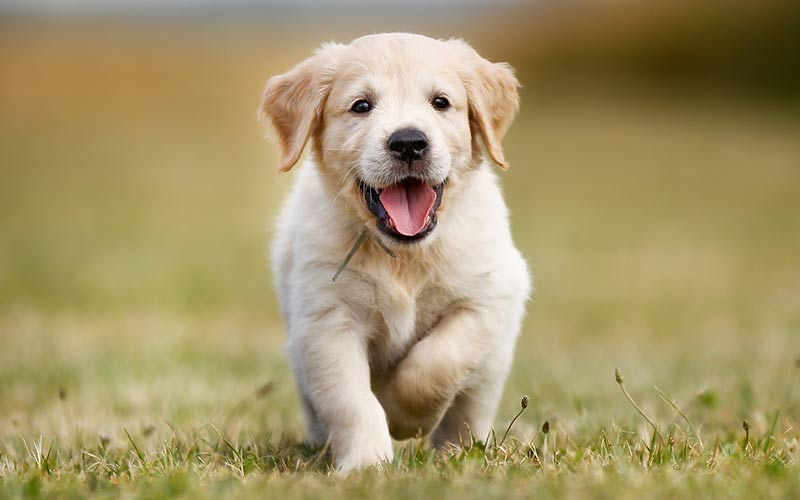

In [3]:
Image(filename="images/test.jpg") 

# 1. Layer: Average Pooling

## 1.1. Using Core Operator:

    op = core.CreateOperator(
        "AveragePool", # The type of operator that we want to run
        ["X"], # Inputs
        ["Y"], # Output
        kernel=2,
        stride_h=2,
        stride_w=2,
        pad_t=0,
        pad_l=0,
        pad_b=0,
        pad_r=0,
    )


### 1.2. Using general model helpers:

    train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
    pool1 = train_model.net.AveragePool(conv1, 'pool1', kernel=2, stride=2)


### 1.3. Using brew:

    train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
    pool1 = brew.average_pool(train_model, conv1, 'pool1', kernel=2, stride=2)


### 1.4. Using CNN model helpers:

    train_model = cnn.CNNModelHelper(name="mnist_train")
    pool1 = train_model.AveragePool(conv1, 'pool1', kernel=2, stride=2)

In [4]:
# Modify Input Data

# 1. Reshape Input data to square matrix
img_1 = cv2.resize(img, (480,480))
print("Reshaped image size = ", img_1.shape)


# 2. Convert 3 channel RGB image to 1 channel grayscale image
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
print("Grayscale image size = ", img_1.shape)

# Save image for display
cv2.imwrite("images/average_pool_in.jpg", img_1)

# 2. Reshape Image to format [N, C, H, W]
# N - Number of images (Batch Size)
# C - Channels
# H - Height
# W - Width
h,w = img_1.shape
img_1 = np.reshape(img_1, (1,1,h,w))
img_1 = img_1.astype(np.float32)
print("Final shape Of Image = ", img_1.shape)

Reshaped image size =  (480, 480, 3)
Grayscale image size =  (480, 480)
Final shape Of Image =  (1, 1, 480, 480)


In [5]:
#Reset the workspace
workspace.ResetWorkspace()

#Create the operator
op = core.CreateOperator(
    "AveragePool", # The type of operator that we want to run
    ["X"], # Inputs
    ["Y"], # Output
    kernel=2,
    stride_h=2,
    stride_w=2,
    pad_t=0,
    pad_l=0,
    pad_b=0,
    pad_r=0,
)

#Run the operator
workspace.ResetWorkspace()
workspace.FeedBlob("X", img_1)
workspace.RunOperatorOnce(op)

True

In [6]:
# Get the output image
out_img_1 = workspace.FetchBlob("Y")
print("Output Data shape = ", out_img_1.shape)
n,c,h,w = out_img_1.shape
out_img_1 = out_img_1[0][0]
print("Final Output Image shape = ", out_img_1.shape)

Output Data shape =  (1, 1, 240, 240)
Final Output Image shape =  (240, 240)


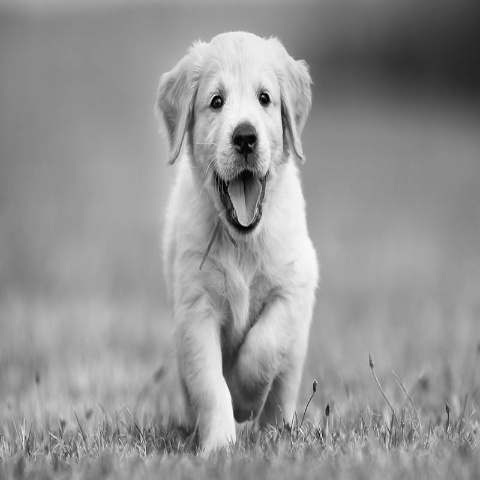

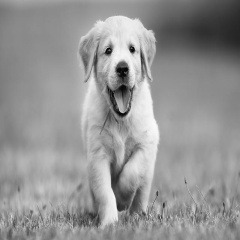

In [7]:
#display the input image
x = Image(filename="images/average_pool_in.jpg")

# Save and display the image
cv2.imwrite("images/average_pool_out.jpg", out_img_1)
y = Image(filename="images/average_pool_out.jpg")

display(x, y)

# 2. Layer: Dropout

## 2.1. Using Core Operator:

    op = core.CreateOperator(
        "Dropout", # The type of operator that we want to run
        ["X"], # Inputs
        ["Y", "mask1"], # Output
        ratio = 0.5,
        is_test = 0,
    )


## 2.2. Using general model helpers:

    train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
    dp1 = train_model.net.Dropout('data', 'dp1', ratio=0.5)


## 2.3. Using brew:

    train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
    fc3 = brew.dropout('data', 'dp1', ratio=0.5)


## 2.4. Using CNN model helpers:

    train_model = cnn.CNNModelHelper(name="mnist_train")
    dp1 = train_model.net.Dropout('data', 'dp1', ratio=0.5)

In [8]:
# Modify Input Data

# 1. Reshape Input data to square matrix
img_1 = cv2.resize(img, (480,480))
print("Reshaped image size = ", img_1.shape)


# 2. Convert 3 channel RGB image to 1 channel grayscale image
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
print("Grayscale image size = ", img_1.shape)

# Save image for display
cv2.imwrite("images/droput_in.jpg", img_1)

# 2. Reshape Image to format [N, C, H, W]
# N - Number of images (Batch Size)
# C - Channels
# H - Height
# W - Width
h,w = img_1.shape
img_1 = np.reshape(img_1, (1,1,h,w))
img_1 = img_1.astype(np.float32)
print("Final shape Of Image = ", img_1.shape)

Reshaped image size =  (480, 480, 3)
Grayscale image size =  (480, 480)
Final shape Of Image =  (1, 1, 480, 480)


In [9]:
#Reset the workspace
workspace.ResetWorkspace()

#Create the operator
op = core.CreateOperator(
    "Dropout", # The type of operator that we want to run
    ["X"], # Inputs
    ["Y", "mask1"], # Output
    ratio = 0.3,
    is_test = 0,
)

#Run the operator
workspace.ResetWorkspace()
workspace.FeedBlob("X", img_1)
workspace.RunOperatorOnce(op)

True

In [10]:
# Get the output image
out_img_1 = workspace.FetchBlob("Y")
print("Output Data shape = ", out_img_1.shape)
n,c,h,w = out_img_1.shape
out_img_1 = out_img_1[0][0]
print("Final Output Image shape = ", out_img_1.shape)

Output Data shape =  (1, 1, 480, 480)
Final Output Image shape =  (480, 480)


First Image: Input
Second Image: Output


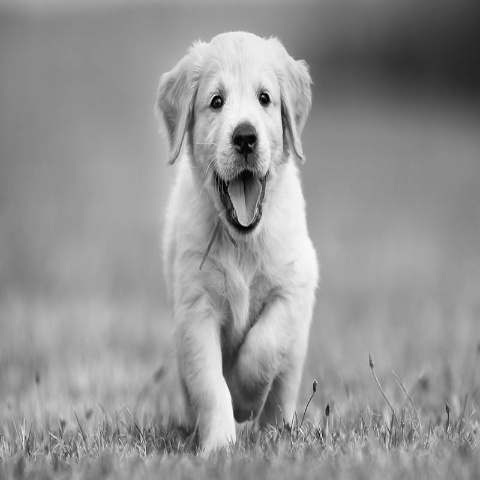

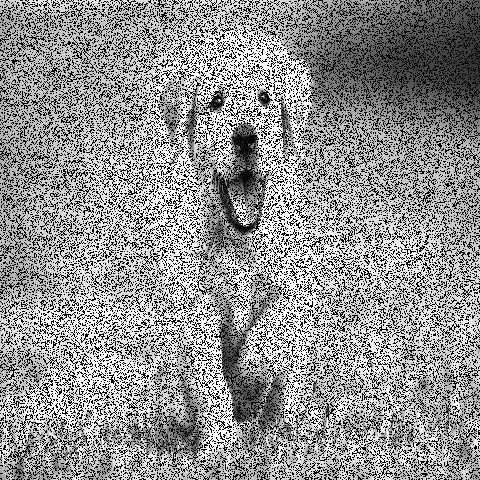

In [11]:
#display the input image
x = Image(filename="images/droput_in.jpg")

# Save and display the image
cv2.imwrite("images/droput_out.jpg", out_img_1)
y = Image(filename="images/droput_out.jpg")

print ("First Image: Input")
print ("Second Image: Output")


display(x, y)